In [2]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# 데이터 불러오기

titanic_df = pd.read_csv("./train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 3. 데이터 개별 속성 파악하기

### I.Survived Column

In [5]:
# 생존자, 사망자 명수는?

titanic_df['Survived'].head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
# 생존자 수
titanic_df['Survived'].sum() # 방법1
titanic_df['Survived'].value_counts() # 방법2

0    549
1    342
Name: Survived, dtype: int64

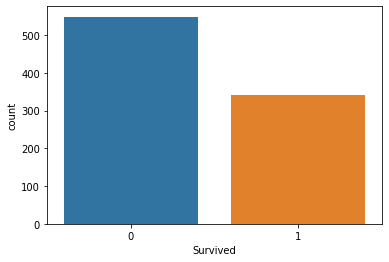

In [14]:
## 생존자수와 사망자수를 Barplot으로 그려보기 sns.countplot()

sns.countplot(x = 'Survived',data = titanic_df)
plt.show()

### II.Pclass

In [23]:
# Pclass에 따른 인원파악
titanic_df[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [29]:
# 생존자 인원?

titanic_df[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [31]:
## 생존 비율?

titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


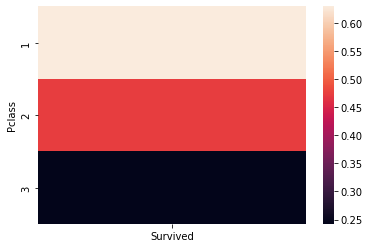

In [33]:
#히트맵 활용

sns.heatmap(titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean())
plt.show()

### III.Sex


In [41]:
titanic_df.groupby(["Sex","Survived"])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

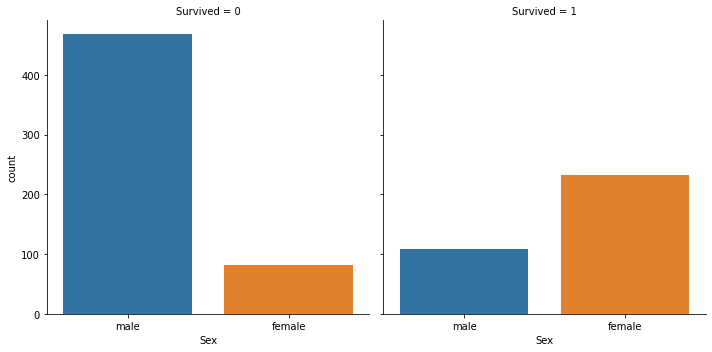

In [42]:
# sns.catplot

sns.catplot(x = "Sex",col = 'Survived', kind = 'count',data= titanic_df)
plt.show()

### IV. Age

#### Remind: 결측치 존재!


In [46]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [50]:
titanic_df[titanic_df.Survived == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

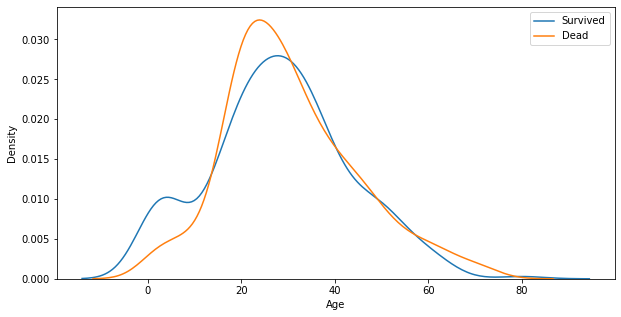

In [55]:
## Survived 1, 0과 Age의 경향성

# figure(어떠한 그래프 도면) -> axis(figure안에 있는 x축 y축 틀) -> plot(그려지는거)

fig,ax = plt.subplots(1,1,figsize = (10,5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'],ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'],ax=ax)
plt.legend(["Survived","Dead"])
plt.show()

### Appendix I. Sex + Pclass vs Survived

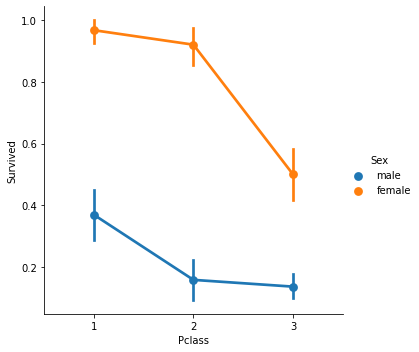

In [58]:
# sns.catplot() 복합적인 요소를 분석할 때 많이씀
sns.catplot(x = "Pclass",y="Survived",hue ="Sex",kind= "point",data = titanic_df)
plt.show()
# 점은 추정치, 막대는 신뢰구간을 나타냄

### Appendix II. Age + Pclass

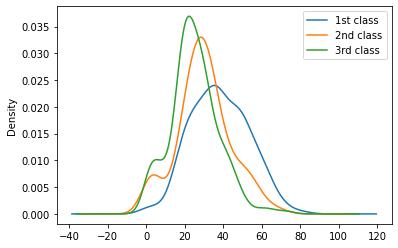

In [64]:
### Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind ='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind ='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind ='kde')
plt.legend(["1st class","2nd class","3rd class"])
plt.show()